In [13]:
import numpy as np
from sklearn.datasets import make_blobs
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

from PROMETHEE import PROMETHEE_2

In [14]:
centers_ = [(5, 5, 5, 5, 5), (10, 10, 10, 10, 10), (15, 15,15,15,15), (20, 20,20,20,20)]

X, y = make_blobs(n_samples=[1, 5, 5, 4], centers=centers_, n_features=5, random_state=0)

In [15]:
X

array([[14.02272212, 15.95008842, 14.84864279, 14.89678115, 15.4105985 ],
       [30.15634897, 31.23029068, 31.20237985, 29.61267318, 29.69769725],
       [12.44701018, 15.6536186 , 15.8644362 , 14.25783498, 17.26975462],
       [50.42833187, 50.06651722, 50.3024719 , 49.36567791, 49.63725883],
       [15.14404357, 16.45427351, 15.76103773, 15.12167502, 15.44386323],
       [50.72909056, 50.12898291, 51.13940068, 48.76517418, 50.40234164],
       [49.59821906, 48.36980165, 50.46278226, 49.09270164, 50.0519454 ],
       [13.54563433, 15.04575852, 14.81281615, 16.53277921, 16.46935877],
       [29.5619257 , 28.74720464, 30.77749036, 28.38610215, 29.78725972],
       [28.95144703, 28.57998206, 28.29372981, 31.9507754 , 29.49034782],
       [49.32753955, 49.64044684, 49.18685372, 48.2737174 , 50.17742614],
       [29.10453344, 30.3869025 , 29.48919486, 28.81936782, 29.97181777],
       [15.33367433, 16.49407907, 14.79484174, 15.3130677 , 14.14590426],
       [30.15494743, 30.37816252, 29.1

In [16]:
m, n = X.shape

n_simulations = 30

W = np.zeros(shape = (n, n_simulations))
P = np.zeros(shape = (n, n_simulations))
Q = np.zeros(shape = (n, n_simulations))

Net_Flows = np.zeros(shape = (m, n_simulations))
Pos_Flows = np.zeros(shape = (m, n_simulations))
Neg_Flows = np.zeros(shape = (m, n_simulations))
results = [[] for s in range (n_simulations)]

# Usaremos sempre a função de preferência do tipo 5
s_curve = [0 for j in range (n)] 
pref = [5 for j in range (n)]

for s in range (n_simulations):
    W [:,s] = np.random.dirichlet(np.ones(n),size=1).reshape(n) # weights
    Q [:,s] = np.random.uniform (2,6, n)
    P [:,s] = np.random.uniform (8, 12, n)
    results[s], Net_Flows[:,s], Pos_Flows[:,s], Neg_Flows[:,s] = PROMETHEE_2 (X, Q[:,s], P[:,s], s_curve, W[:,s], pref)
    print (f'simulation {s+1} completed')

simulation 1 completed
simulation 2 completed
simulation 3 completed
simulation 4 completed
simulation 5 completed
simulation 6 completed
simulation 7 completed
simulation 8 completed
simulation 9 completed
simulation 10 completed
simulation 11 completed
simulation 12 completed
simulation 13 completed
simulation 14 completed
simulation 15 completed
simulation 16 completed
simulation 17 completed
simulation 18 completed
simulation 19 completed
simulation 20 completed
simulation 21 completed
simulation 22 completed
simulation 23 completed
simulation 24 completed
simulation 25 completed
simulation 26 completed
simulation 27 completed
simulation 28 completed
simulation 29 completed
simulation 30 completed


In [18]:
mu_net = np.mean(Net_Flows, axis=1)
sigma_net = np.std(Net_Flows, axis=1)

#Construindo um DataFrame dos resultados
Sigma_Mu_df = pd.DataFrame({"Sigma": sigma_net,"Mu": mu_net}, index= ['a_' + str(i+1) for i in range (m)])
Sigma_Mu_df


,Sigma,Mu
a_1,6.061549e-03,-0.591670
a_2,1.102850e-03,0.143287
a_3,8.151612e-03,-0.592278
a_4,3.185650e-16,0.785714
a_5,5.846466e-03,-0.586432
a_6,3.185650e-16,0.785714
a_7,3.185650e-16,0.785714
a_8,6.345133e-03,-0.587582
a_9,1.354163e-03,0.142113
a_10,4.020453e-03,0.144387


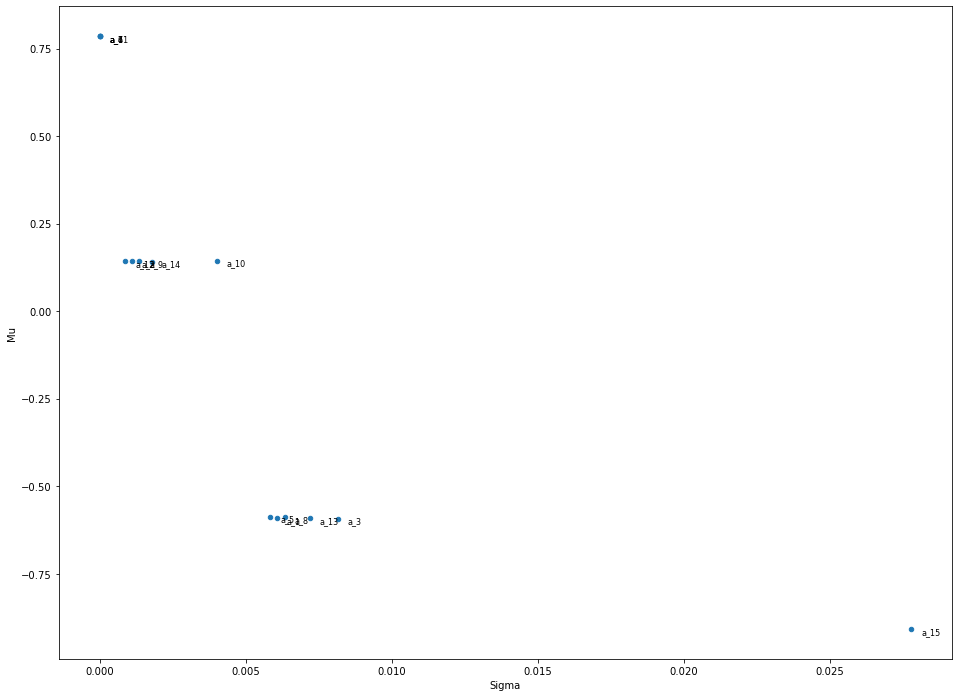

In [19]:
from matplotlib.pyplot import cm
fig, ax = plt.subplots()
cmap = cm.get_cmap('Spectral')
Sigma_Mu_df.plot('Sigma', 'Mu', kind='scatter', ax=ax, figsize = (16,12))
for k, v in Sigma_Mu_df.iterrows():
    ax.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='black')
for k, v in Sigma_Mu_df.iterrows():
    if (k=='North Korea'):
        plt.annotate(k, v,
                xytext=(10,-5), textcoords='offset points',
                family='sans-serif', fontsize=8, color='red')